In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
import yfinance as yf

# Define the ticker symbol for the stock you want to fetch data for
ticker_symbol = 'AAPL'  # Example: Apple Inc.

# Fetch historical data for the specified stock
stock_data = yf.download(ticker_symbol, start='2016-01-01', end='2024-06-03')

# Print the first few rows of the fetched data
print(stock_data.head())



c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  23.914486  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.315201  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.858929  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.894175  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.009951  283192000


In [3]:
# Reset index to turn 'Date' into a regular column
stock_data.reset_index(inplace=True)

# Drop the 'Date' column and the 'Adj Close' column
modified_stock_data = stock_data.drop(columns=['Adj Close'])

# Print the modified DataFrame
print(modified_stock_data.head())


        Date       Open       High        Low      Close     Volume
0 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


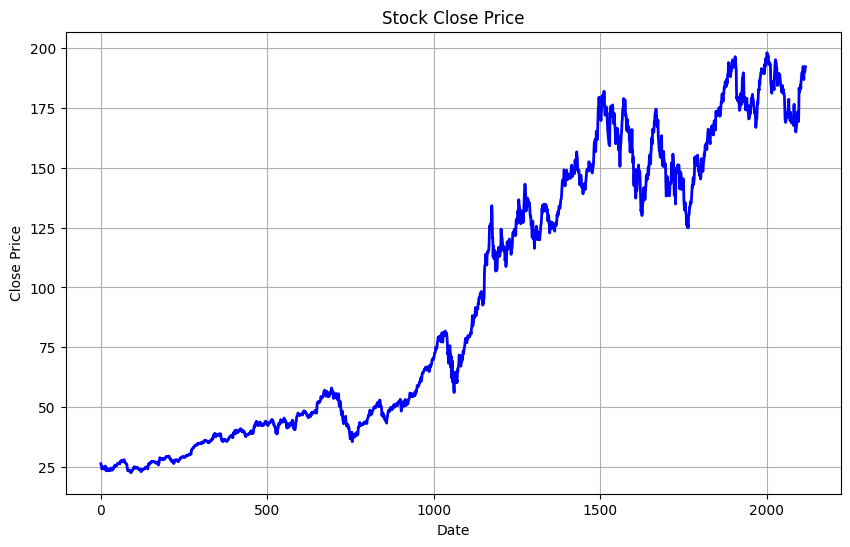

In [4]:
import matplotlib.pyplot as plt

# Assuming the DataFrame containing the data is named 'stock_data'

# Plotting the 'Close' column
plt.figure(figsize=(10,6))  # Set the figure size
plt.plot(stock_data.index, stock_data['Close'], color='blue', linewidth=2)  # Plot the 'Close' column
plt.title('Stock Close Price')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Close Price')  # Set the label for the y-axis
plt.grid(True)  # Enable gridlines
plt.show()  # Display the plot


In [5]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.914486,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.315201,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.858929,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.894175,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.009951,283192000
...,...,...,...,...,...,...,...
2112,2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
2113,2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
2114,2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
2115,2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900


In [6]:
ma100 = stock_data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2112    179.717800
2113    179.775200
2114    179.858999
2115    179.960099
2116    180.027000
Name: Close, Length: 2117, dtype: float64

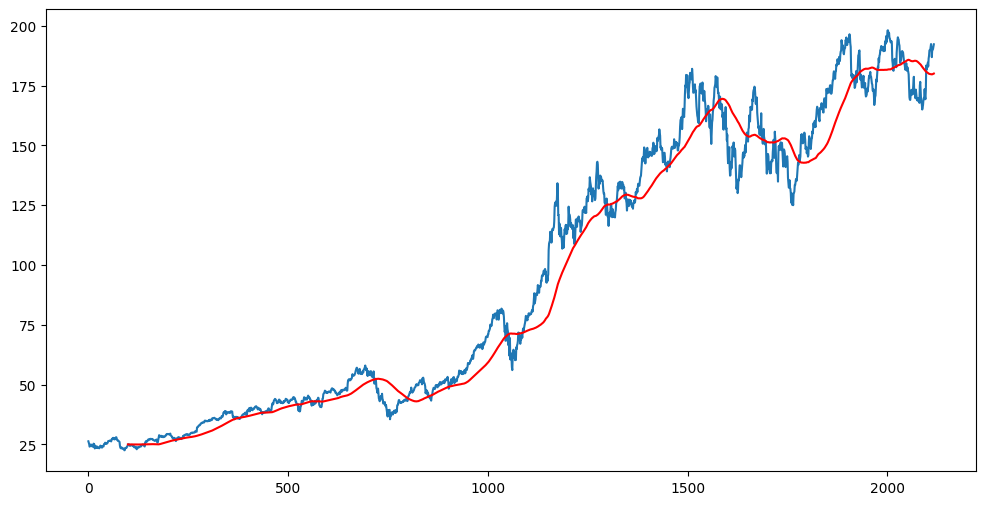

In [7]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')
plt.show()

In [8]:
ma200 = stock_data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2112    180.98280
2113    181.04290
2114    181.10540
2115    181.16455
2116    181.23855
Name: Close, Length: 2117, dtype: float64

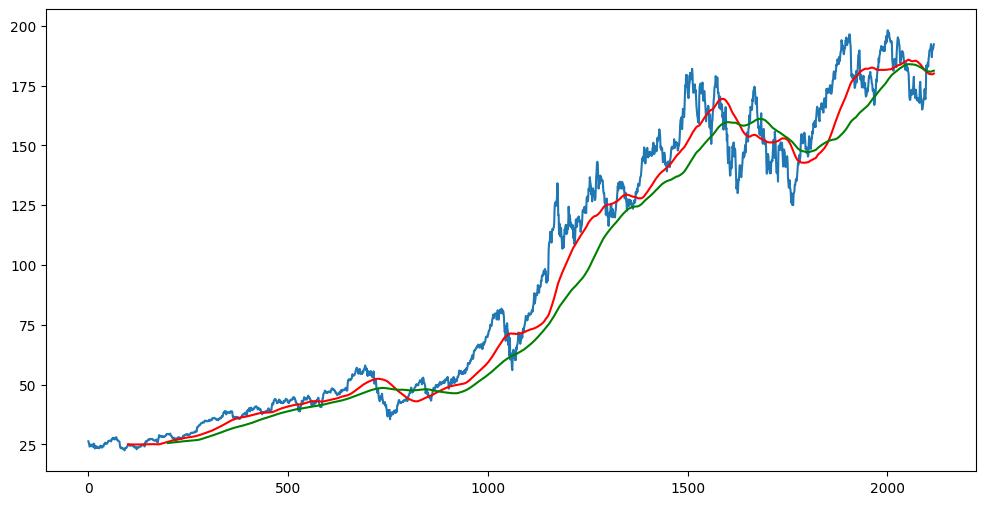

In [9]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [10]:
stock_data.shape

(2117, 7)

In [11]:
#Splitting Data into Training and Testing Sets
data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70): int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)


(1481, 1)
(636, 1)


In [12]:
data_training.head()

,Close
0,26.337500
1,25.677500
2,25.174999
3,24.112499
4,24.240000


In [13]:
data_testing.head()

,Close
1481,157.869995
1482,160.550003
1483,161.020004
1484,161.410004
1485,161.940002


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02798181],
       [0.02306029],
       [0.01931323],
       ...,
       [0.9501137 ],
       [0.95757054],
       [0.97613812]])

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
#ML Model


In [18]:
import tensorflow as tf
from tensorflow import keras


In [19]:
# Set the Keras backend
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'  # or 'theano', 'cntk', etc.

# Now import Keras modules
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout




In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 283ms/step - loss: 0.0859
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - loss: 0.0099
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - loss: 0.0076
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - loss: 0.0073
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0063
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0069
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0058
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0053
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - loss: 0.0054
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0056
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0052
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0060
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 392ms/step - loss: 0.0042
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0043
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step -

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1481,157.869995
1482,160.550003
1483,161.020004
1484,161.410004
1485,161.940002


In [ ]:
data_training.tail()

,Close
1476,147.869995
1477,149.990005
1478,150.000000
1479,151.000000
1480,153.490005


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

,Close
0,136.330002
1,136.960007
2,137.270004
3,139.960007
4,142.020004


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.54740793e-01],
       [1.63360370e-01],
       [1.67601682e-01],
       [2.04405654e-01],
       [2.32590049e-01],
       [2.67478583e-01],
       [2.49281815e-01],
       [2.74866642e-01],
       [2.66520759e-01],
       [2.82117959e-01],
       [3.30140867e-01],
       [3.20974112e-01],
       [2.92379280e-01],
       [2.38473107e-01],
       [2.89095582e-01],
       [2.78834261e-01],
       [2.97988852e-01],
       [3.22068677e-01],
       [3.27951943e-01],
       [2.97578416e-01],
       [2.73087946e-01],
       [2.82117959e-01],
       [2.85127963e-01],
       [2.80476214e-01],
       [3.05650605e-01],
       [3.00041033e-01],
       [3.01546035e-01],
       [2.88958840e-01],
       [2.88274710e-01],
       [2.81570780e-01],
       [2.85127963e-01],
       [3.26583684e-01],
       [3.29456946e-01],
       [3.57093953e-01],
       [3.44370015e-01],
       [2.91968844e-01],
       [2.96620593e-01],
       [3.17006493e-01],
       [3.37802828e-01],
       [3.36571311e-01],


In [ ]:
input_data.shape

(736, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(636, 100, 1)
(636,)


In [ ]:
#Making Predictions

y_predicted = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


In [ ]:
y_predicted.shape

(636, 1)

In [ ]:
y_predicted

array([[0.35943127],
       [0.36013818],
       [0.3632089 ],
       [0.36926204],
       [0.37857294],
       [0.39088166],
       [0.4047078 ],
       [0.41894537],
       [0.43352082],
       [0.44844878],
       [0.46342283],
       [0.47767317],
       [0.49100605],
       [0.50419796],
       [0.5184243 ],
       [0.53423834],
       [0.55219793],
       [0.5717676 ],
       [0.5916861 ],
       [0.61146086],
       [0.62955284],
       [0.64454556],
       [0.65547967],
       [0.66263306],
       [0.6671368 ],
       [0.67019933],
       [0.67331886],
       [0.67734647],
       [0.68255997],
       [0.68862414],
       [0.6949177 ],
       [0.701568  ],
       [0.70831275],
       [0.7140636 ],
       [0.7175848 ],
       [0.7182387 ],
       [0.7159934 ],
       [0.71182215],
       [0.70683444],
       [0.7013954 ],
       [0.69586265],
       [0.690019  ],
       [0.68318415],
       [0.674801  ],
       [0.6645135 ],
       [0.6522777 ],
       [0.6380377 ],
       [0.622

In [ ]:
scaler.scale_

array([0.01368176])

In [ ]:
scale_factor = 1/0.01368176
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

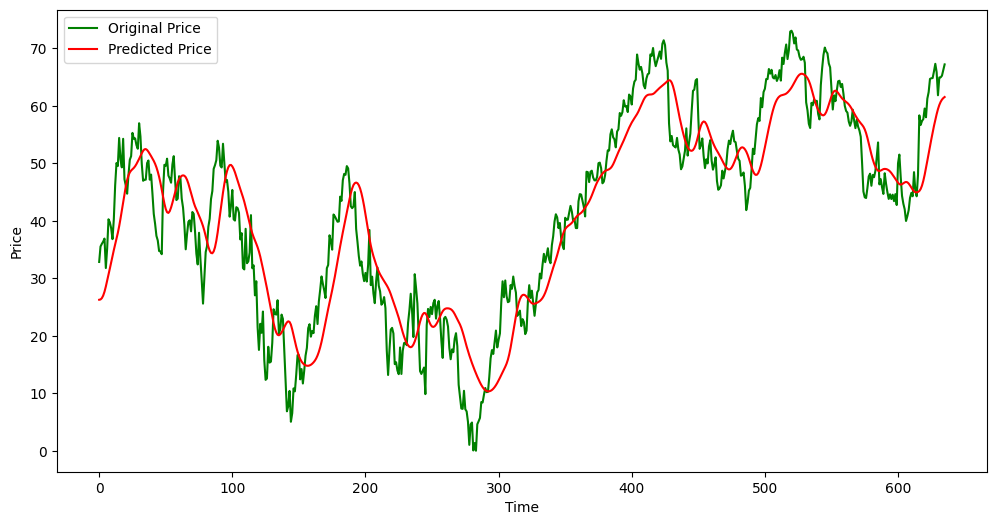

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

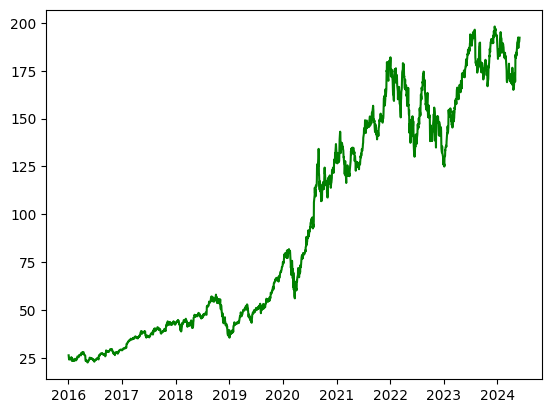

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting 

Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col,

Predicting: 67it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative t

Predicting: 67it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


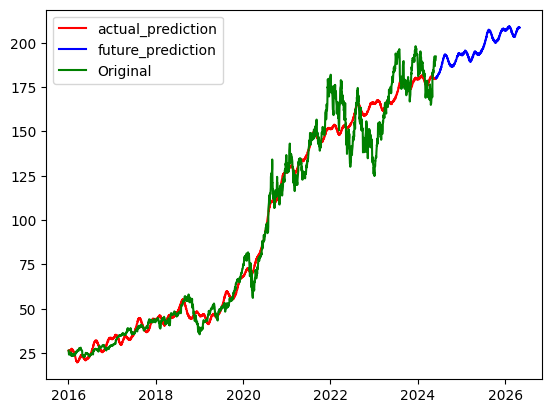

WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Subhradeep Nath\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this 

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'e38d0491-2f98-4d4d-81cc-ff1f4d289d04',
              'x': array([datetime.datetime(2024, 6, 3, 0, 0),
                          datetime.datetime(2024, 6, 4, 0, 0),
                          datetime.datetime(2024, 6, 5, 0, 0), ...,
                          datetime.datetime(2026, 4, 29, 0, 0),
                          datetime.datetime(2026, 4, 30, 0, 0),
                          datetime.datetime(2026, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 82.23961 ,  82.27747 ,  82.31532 , ..., 108.550224, 108.58806 ,
                          108.62594 ], dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonal

In [ ]:
from neuralprophet import NeuralProphet

stocks= stock_data
stocks['Date']= pd.to_datetime(stocks['Date'])
stocks= stocks[['Date','Close']]
stocks.columns = ['ds', 'y']
plt.plot(stocks['ds'], stocks['y'], label = 'Original', c = 'g')
plt.show()

model = NeuralProphet()
model.fit(stocks)

future = model.make_future_dataframe(stocks, periods = 500)
forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'actual_prediction', c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
forecast['ds'], forecast['yhat1']
plt.plot(stocks['ds'], stocks['y'], label = 'Original', c = 'g')
plt.legend()
plt.show()

model.plot_components(forecast)


